In [1]:
'''
Absorbance
'''

import pandas as pd
import glob
import os

save_option = True
figsavepath = "../Figures/FigureS21_Urbach.svg"

path = "../Data/FigureS21_Urbach"
csv_list = glob.glob(f'{path}/*.csv')
csv_list.sort()

sample_names = []
df_list = []
for i, csv in enumerate(csv_list):
    sample_name = os.path.basename(csv).split('.')[0] + os.path.basename(csv).split('.')[1]
    sample_names.append(sample_name)
    df = pd.read_csv(csv, skiprows = 1)
    df_list.append(df)
    print(f'{i}: {sample_name}')

0: 230811-A AbsSample
1: 230814-A AbsSample
2: 230816-A AbsSample
3: 230829-B AbsSample
4: 230830-A AbsSample
5: 230907-D AbsSample


Urbach Energy is 18.74 meV
Urbach Energy is 24.39 meV


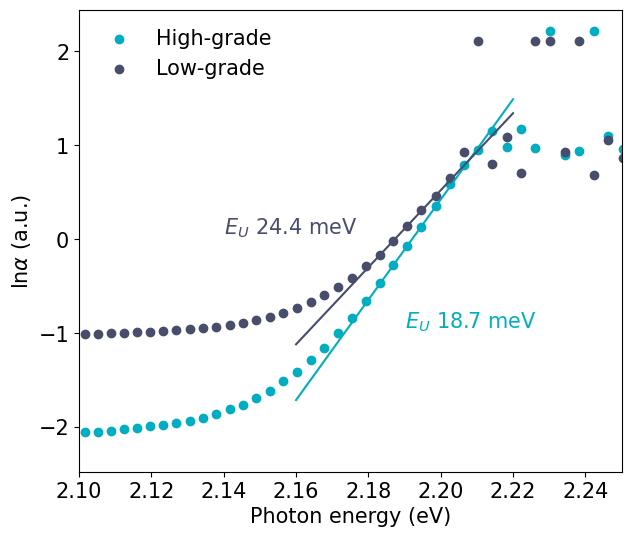

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 15
fig = plt.figure(figsize=(7,6))

plot_id = [5,0] # High-grade and Low-grade
colors = ['#01ADC1','#474D6B']
labels = ['High-grade','Low-grade']
thicknesses = [2.5,2.8]
x_range = np.arange(2.18, 2.2, 0.001) # decide the fitting range (start, end, _)

for k, plot in enumerate(plot_id):

    # plot the original data
    df = df_list[plot]
    x = df['nm'].to_list()
    y = df[' A'].to_list()
    x = [1240/n for n in x] # nm to eV
    y = [n/thicknesses[k]/np.log10(math.e) for n in y] # A to absorption coefficients, cm-1
    y = [np.log(n) for n in y] # alpha to ln(alpha)

    # linear fitting
    x_fit, y_fit = [], []
    for i in range(len(x)):
        if x[i] > x_range[0] and x[i] < x_range[-1]:
            x_fit.append(x[i])
            y_fit.append(y[i])

    slope, intercept = np.polyfit(x_fit, y_fit, 1)
    y_range = [slope*n + intercept for n in x_range]
    
    x_line = np.arange(2.16,2.23,0.01)
    y_line = [slope*n + intercept for n in x_line]
    
    # plot
    # plt.plot(x,y, marker='o', label=labels[k], color = colors[k])    
    # plt.plot(x_line, y_line, color='red')
    plt.scatter(x,y, marker='o', label=labels[k], color = colors[k])    
    plt.plot(x_line, y_line, color=colors[k])

    Eu = 1/slope * 1000
    print(f'Urbach Energy is {Eu:.2f} meV')
    
plt.xlim(2.1, 2.25)
plt.legend(frameon=False)
plt.xlabel('Photon energy (eV)')
plt.ylabel('$ln{α} (a.u.)$')
plt.ylabel('ln'+'$\it{α}$' + ' (a.u.)')
plt.text(2.19, -1, '$\it{E}_{U}$' + ' 18.7 meV', ha='left', va='bottom',color=colors[0],fontsize=15)
plt.text(2.14, 0, '$\it{E}_{U}$' + ' 24.4 meV', ha='left', va='bottom',color=colors[1],fontsize=15)

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')